In [1]:
import networkx as nx
import time
import random 
import bisect 
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Module.count import *
from Module.count_col import *
from Module.Curve_Fitting_MLE import *
from scipy.optimize import curve_fit
%matplotlib inline
plt.style.use('classic')

In [2]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
name = 'chicken'
filename = name + '.txt' #change filename if you want to get statictical information of another
##text file.
corpora, longest = read_file(filename, encode)

read file successfully!


In [21]:
def reverse(corpora):
    '''read a corpora and retrive its functionality adjacency matrix
    
    input:
    corpora: list, output of read_file
    
    output:
    add a frame "#collocations" (numbers of collocations of syls) in pdframe2
    add a frame "#links" (numbers of links of words) in pdframe1
        
    '''
    
    fun_conn = [[0 for i in range(len(corpora))] for i in range(len(corpora))]
    syllgram = [corpora[i].split('-') for i in range(len(corpora))]
    
    for i in range(len(corpora)):
        syl_source = syllgram[i]
        for j in range(i, len(corpora)):
            syl_target = syllgram[j]
            for s in syl_source:
                if s in syl_target:
                    fun_conn[i][j] += 1
                    fun_conn[j][i] += 1
        fun_conn[i][i] = 0

    return fun_conn

In [29]:
def reverse_head(corpora):
    '''read a corpora and retrive its functionality adjacency matrix
    
    input:
    corpora: list, output of read_file
    
    output:
    add a frame "#collocations" (numbers of collocations of syls) in pdframe2
    add a frame "#links" (numbers of links of words) in pdframe1
        
    '''
    
    fun_conn = [[0 for i in range(len(corpora))] for i in range(len(corpora))]
    syllgram = [corpora[i].split('-') for i in range(len(corpora))]
    
    for i in range(len(corpora)):
        syl_source = syllgram[i][0]
        for j in range(i, len(corpora)):
            syl_target = syllgram[j][0]
            if syl_source == syl_target:
                fun_conn[i][j] += 1
                fun_conn[j][i] += 1
        fun_conn[i][i] = 0

    return fun_conn

In [22]:
def array2txt(array, filename):
    with open(filename, 'w') as txt:
        for i in array:
            txt.write(str(i)+'\n')

In [41]:
start = time.time()
fun_conn = reverse(corpora)
end = time.time()
print(end - start)

8.295474529266357


In [42]:
start = time.time()
array2txt(fun_conn, 'chicken_functionality.txt')
end = time.time()
print(end - start)

2.4231388568878174


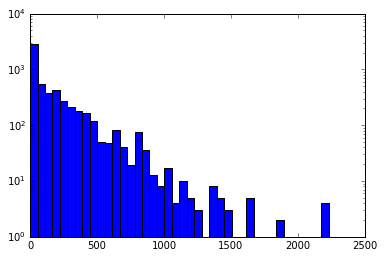

In [43]:
degree = sorted([sum(i) for i in fun_conn], reverse = True)
index = [i+1 for i in range(len(degree))]
plt.hist(degree, bins = 40)
#plt.xscale('log')
plt.yscale('log')
plt.show()